In [1]:
%matplotlib notebook
from blockops import BlockOperator, BlockIteration, I

Definition of the block operators, that are common to each primary block iterations :

In [2]:
nBlocks = 3

phi = BlockOperator(r'\phi')  # integration operator
phiD = BlockOperator(r'\phi_{\Delta}')  # inverse approximate integration operator
chi = BlockOperator(r'\chi')  # transmission operator

blockOps = dict(I=I, phi=phi, phiD=phiD, chi=chi)

### Parareal like primary block iteration :

$$u_{n+1}^{k+1} = (\phi^{-1}\chi - \phi_{\Delta}^{-1}\chi) u_n^k + \phi_{\Delta}^{-1}\chi u_n^{k+1}$$

<IPython.core.display.Javascript object>


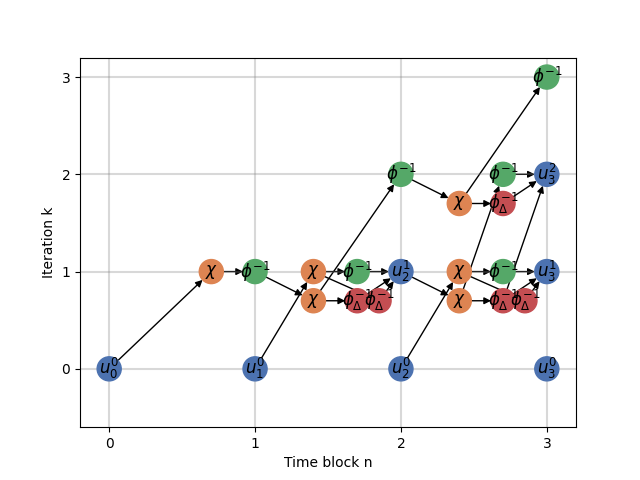

In [3]:
parareal = BlockIteration(
    update="(phi**(-1)-phiD**(-1))*chi*u_{n}^k + phiD**(-1)*chi* u_{n}^{k+1}",
    propagator=phi**(-1)*chi, 
    **blockOps)
parareal.plotGraph(N=nBlocks, K=[1, 2, 3])

#### With predictor:

$$u_{n+1}^{0} = \phi_{\Delta}^{-1} \chi u_{n}^{0}$$

<IPython.core.display.Javascript object>


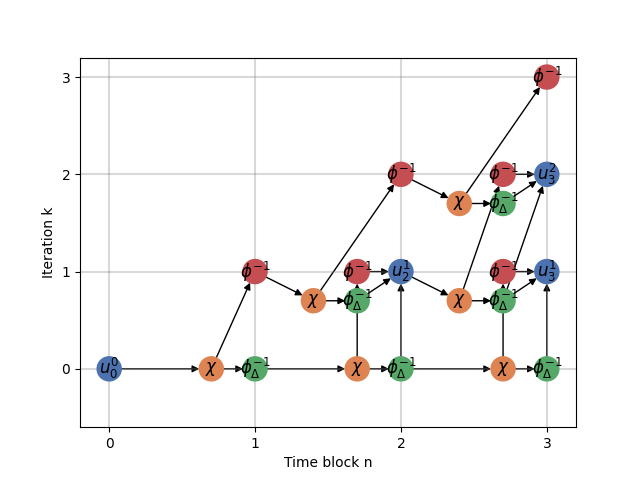

In [4]:
parareal = BlockIteration(
    update="(phi**(-1)-phiD**(-1))*chi*u_{n}^k + phiD**(-1)*chi* u_{n}^{k+1}",
    propagator=phi**(-1)*chi, predictor=phiD**(-1)*chi, 
    **blockOps)
parareal.plotGraph(N=nBlocks, K=[1, 2, 3])

### Approximate Block Jacobi block iteration :

$$u_{n+1}^{k+1} =  \phi_{\Delta}^{-1}\chi u_n^k + (I-\phi_{\Delta}^{-1}\phi) u_{n+1}^{k}$$

<IPython.core.display.Javascript object>


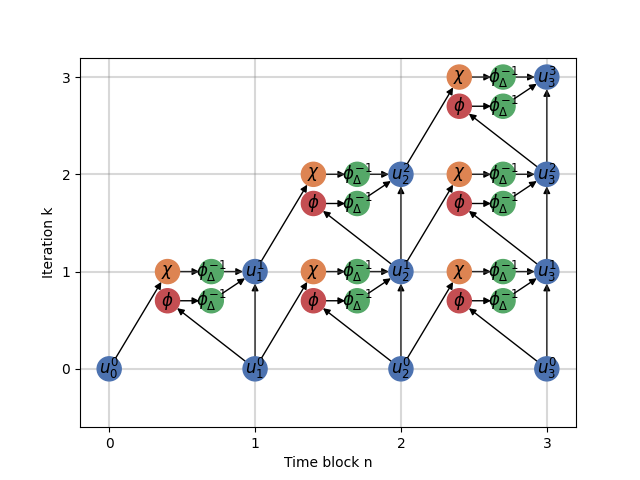

In [5]:
approxBlockJacobi = BlockIteration(
    update="phiD**(-1)*chi*u_{n}^k + (I-phiD**(-1)*phi)* u_{n+1}^{k}",
    propagator=phi**(-1)*chi,
    **blockOps)
approxBlockJacobi.plotGraph(N=nBlocks, K=[1, 2, 3])

#### With predictor:

$$u_{n+1}^{0} = \phi_{\Delta}^{-1} \chi u_{n}^{0}$$

<IPython.core.display.Javascript object>


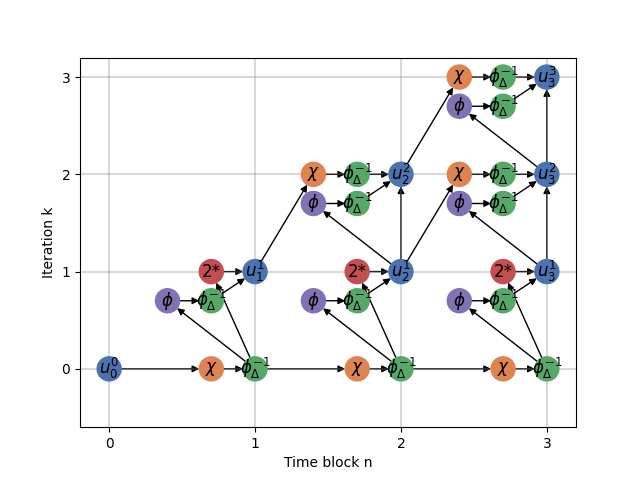

In [6]:
approxBlockJacobi = BlockIteration(
    update="phiD**(-1)*chi*u_{n}^k + (I-phiD**(-1)*phi)* u_{n+1}^{k}",
    propagator=phi**(-1)*chi, predictor=phiD**(-1)*chi,
    **blockOps)
approxBlockJacobi.plotGraph(N=nBlocks, K=[1, 2, 3])

### Approximate Block Gauss-Seidel block iteration :

$$u_{n+1}^{k+1} =  \phi_{\Delta}^{-1}\chi u_n^{k+1} + (I-\phi_{\Delta}^{-1}\phi) u_{n+1}^{k}$$

<IPython.core.display.Javascript object>


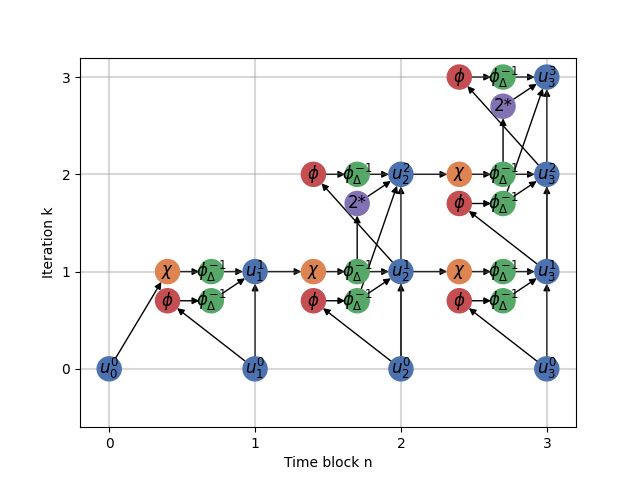

In [7]:
approxBlockGaussSeidel = BlockIteration(
    update="phiD**(-1)*chi*u_{n}^{k+1} + (I-phiD**(-1)*phi)* u_{n+1}^{k}",
    propagator=phi**(-1)*chi,
    **blockOps)
approxBlockGaussSeidel.plotGraph(N=nBlocks, K=[1, 2, 3])

#### With predictor:

$$u_{n+1}^{0} = \phi_{\Delta}^{-1} \chi u_{n}^{0}$$

<IPython.core.display.Javascript object>


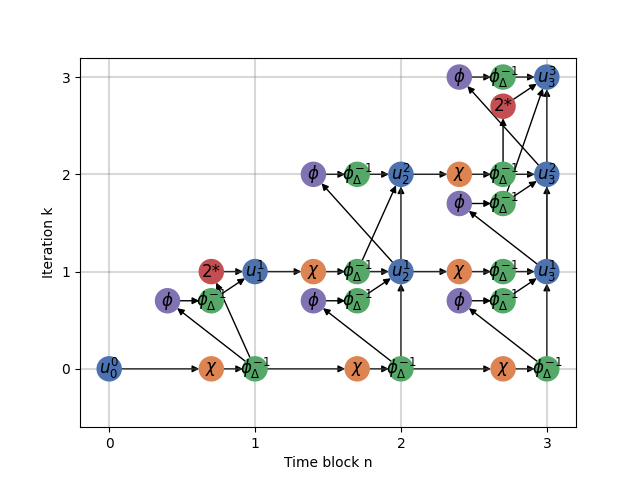

In [8]:
approxBlockGaussSeidel = BlockIteration(
    update="phiD**(-1)*chi*u_{n}^{k+1} + (I-phiD**(-1)*phi)* u_{n+1}^{k}",
    propagator=phi**(-1)*chi, predictor=phiD**(-1)*chi,
    **blockOps)
approxBlockGaussSeidel.plotGraph(N=nBlocks, K=[1, 2, 3])